## Window Functions: Rolling & Expanding Metrics

### Rolling average air quality since 2010 for new york city

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB
None


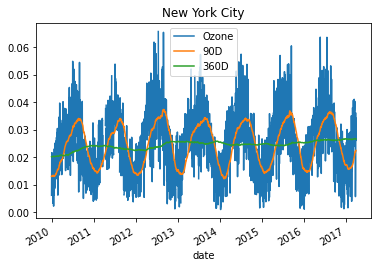

In [3]:
data = pd.read_csv('ozone.csv', parse_dates=['date'], index_col='date')
print(data.info())


data['90D'] = data.Ozone.rolling('90D').mean()
data['360D'] = data.Ozone.rolling('360D').mean()


data['2010':].plot(title='New York City')
plt.show()

### Rolling 360-day median & std. deviation for nyc ozone data since 2000

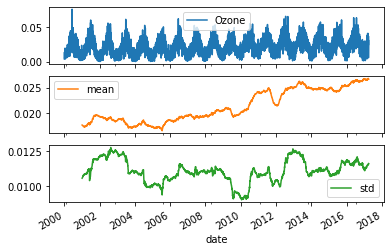

In [3]:

data = pd.read_csv('ozone.csv', parse_dates=['date'], index_col='date').dropna()


rolling_stats = data.Ozone.rolling(360).agg(['mean', 'std'])


stats = data.join(rolling_stats)


stats.plot(subplots=True);
plt.show()

### Rolling quantiles for daily air quality in nyc

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6300 non-null   float64
dtypes: float64(1)
memory usage: 98.4 KB


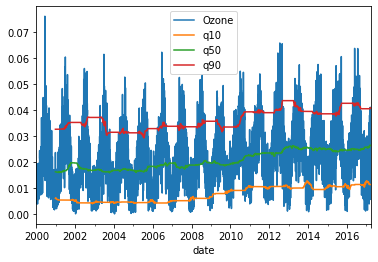

In [4]:

data = data.resample('D').interpolate()
data.info()


rolling = data.rolling(360)['Ozone']


data['q10'] = rolling.quantile(.1)
data['q50'] = rolling.quantile(.5)
data['q90'] = rolling.quantile(.9)


data.plot()
plt.show()


### Rolling quantiles for daily air quality in nyc

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6300 non-null   float64
 1   90D     6300 non-null   float64
 2   360D    6300 non-null   float64
dtypes: float64(3)
memory usage: 196.9 KB


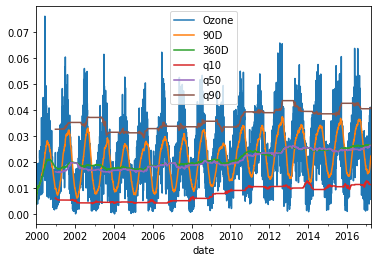

In [4]:

data = data.resample('D').interpolate()
data.info()


rolling = data.rolling(360)['Ozone']


data['q10'] = rolling.quantile(.1)
data['q50'] = rolling.quantile(.5)
data['q90'] = rolling.quantile(.9)


data.plot()
plt.show()


### Cumulative sum vs .diff()

In [5]:

differences = data.diff().dropna()


start_price = data.first('D')


cumulative_sum = start_price.append(differences).cumsum()


print(data.equals(cumulative_sum))


False


In [8]:
data.diff()

,Ozone,90D,360D,q10,q50,q90
date,,,,,,
2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-02,0.005454,0.002727,2.726833e-03,NaN,NaN,NaN
2000-01-03,-0.003906,-0.000393,-3.931111e-04,NaN,NaN,NaN
2000-01-04,0.003137,0.000588,5.878194e-04,NaN,NaN,NaN
2000-01-05,0.005036,0.001360,1.359925e-03,NaN,NaN,NaN
...,...,...,...,...,...,...
2017-03-27,-0.025772,-0.000138,-6.273278e-05,-0.000058,-0.000035,0.0
2017-03-28,0.008231,0.000007,-4.565389e-05,0.000000,-0.000035,0.0
2017-03-29,0.020471,0.000236,7.522222e-07,0.000000,0.000000,0.0


In [7]:
differences

,Ozone,90D,360D,q10,q50,q90
date,,,,,,
2000-12-26,-0.008917,0.000064,3.068143e-05,0.000124,0.000000,0.0
2000-12-27,-0.007063,-0.000021,-5.080000e-06,0.000000,0.000000,0.0
2000-12-28,0.004205,0.000040,1.809476e-05,0.000074,0.000000,0.0
2000-12-29,-0.006578,-0.000092,-9.662381e-06,-0.000074,0.000000,0.0
2000-12-30,0.001185,-0.000107,-2.066524e-05,0.000000,0.000000,0.0
...,...,...,...,...,...,...
2017-03-27,-0.025772,-0.000138,-6.273278e-05,-0.000058,-0.000035,0.0
2017-03-28,0.008231,0.000007,-4.565389e-05,0.000000,-0.000035,0.0
2017-03-29,0.020471,0.000236,7.522222e-07,0.000000,0.000000,0.0


In [6]:
start_price

,Ozone,90D,360D,q10,q50,q90
date,,,,,,
2000-01-01,0.004032,0.004032,0.004032,NaN,NaN,NaN


In [9]:
cumulative_sum

,Ozone,90D,360D,q10,q50,q90
date,,,,,,
2000-01-01,0.004032,0.004032,0.004032,NaN,NaN,NaN
2000-12-26,-0.004884,0.004096,0.004063,0.000124,0.000000,0.000000
2000-12-27,-0.011947,0.004075,0.004058,0.000124,0.000000,0.000000
2000-12-28,-0.007742,0.004115,0.004076,0.000197,0.000000,0.000000
2000-12-29,-0.014320,0.004023,0.004066,0.000124,0.000000,0.000000
...,...,...,...,...,...,...
2017-03-27,-0.014015,0.016186,0.012712,0.005284,0.010136,0.008256
2017-03-28,-0.005785,0.016193,0.012667,0.005284,0.010101,0.008256
2017-03-29,0.014686,0.016429,0.012667,0.005284,0.010101,0.008256


### Cumulative sum vs .diff()

In [10]:

differences = data.diff().dropna()


start_price = data.first('D')


cumulative_sum = start_price.append(differences).cumsum()


print(data.equals(cumulative_sum))


False


### Cumulative return on $1,000 invested in google vs apple I

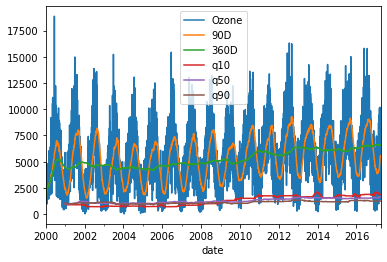

In [11]:

investment = 1000


returns = data.pct_change()


returns_plus_one = returns.add(1)
cumulative_return = returns_plus_one.cumprod()


cumulative_return.mul(investment).plot()
plt.show();

### Cumulative sum vs .diff()

In [12]:

differences = data.diff().dropna()


start_price = data.first('D')


cumulative_sum = start_price.append(differences).cumsum()


print(data.equals(cumulative_sum))

False
